# Hands On
First cells just for setting up the environment. WE need to install a package (just few seconds...)

In [1]:
# @title Installing dependencies
!pip install gastrodon


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


## Change endpoint below

In [2]:
# @title Preparing connections
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
pd.options.display.width=120
pd.options.display.max_colwidth=100

import ipywidgets as widgets
from IPython.display import display, HTML

prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbo: <http://dbpedia.org/ontology/> .
    @prefix dbp: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
    @prefix wd: <http://www.wikidata.org/entity/> .
    @prefix wdt: <http://www.wikidata.org/prop/direct/> .
    @prefix wikibase: <http://wikiba.se/ontology#> .
    @prefix p: <http://www.wikidata.org/prop/> .
    @prefix ps: <http://www.wikidata.org/prop/statement/> .
    @prefix pq: <http://www.wikidata.org/prop/qualifier/> .
    @prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
    @prefix bd: <http://www.bigdata.com/rdf#> .

""").graph

remote_endpoint = None
endpoint = None

def on_change(change):
  global endpoint
  if change['type'] == 'change' and change['name'] == 'value':
    if 'dbpedia' in change['new']:
      default_graph="http://dbpedia.org"
      base_uri="http://dbpedia.org/resource/"
    else:
      default_graph="http://www.wikidata.org"
      base_uri="http://www.wikidata.org/entity/"
    remote_endpoint = change['new']
    endpoint=RemoteEndpoint(remote_endpoint, default_graph=default_graph, prefixes=prefixes, base_uri=base_uri)

dropdown_widget = widgets.Dropdown(
    options=['http://dbpedia.org/sparql/', 'https://query.wikidata.org/sparql'],
    value=None,
    description='ENDPOINT:',
)

dropdown_widget.observe(on_change)

display(dropdown_widget)


Dropdown(description='ENDPOINT:', options=('http://dbpedia.org/sparql/', 'https://query.wikidata.org/sparql'),…

# Composing a Query
Let's remember the basic query structure of SPARQL:

* PREFIX – Namespaces (~ Dictionaries/ontologies to use)
* SELECT – What you want to receive in the answer
* WHERE – Conditions to fulfil

## Basic query
We want to have a list of the Writers at DBpedia, so lets follow the structure:

* PREFIX - Just select in the list above the dbpedia endpoint and all the prefixes will be charged.
* SELECT - we want to get any single writer, so we will ask for "?writer" (This is an arbitrary name, but I think it's easier to keep that variable name)
* WHERE: It need to be "a" Writer, so it means that the **type** should be Writer. In this case, since we are using the DBpedia ontology, is is called **dbo:Writer**

In [4]:
query_response = endpoint.select("""
SELECT ?writer
WHERE{
    ?writer a dbo:Writer .
}
LIMIT 100
""")
query_response

,writer
0,<Caden_Manson>
1,<Cahit_Sıtkı_Tarancı>
2,<Cahit_Zarifoğlu>
3,<Cai_Chongda>
4,<Cai_Dongfan>
...,...
95,<Carl_Hiaasen>
96,<Carl_Hoffman>
97,<Carl_Hulse>
98,<Carl_Johanson_(author)>


# URIs as a result
URIs are perfect for machines, but for humans it's better to have a textual answer. If we want to have this textual answer, we need to add a new triple to the Query. Let's have a look to this resource in order to check where I can find that info:

https://dbpedia.org/page/Caden_Manson

It seems to be foaf:name

In [5]:
query_response = endpoint.select("""
SELECT ?name
WHERE{
    ?writer a dbo:Writer .
    ?writer foaf:name ?name .
}
LIMIT 100
""")
query_response

,name
0,Caden Manson
1,Cahit Sıtkı Tarancı
2,Cahit Zarifoğlu
3,Cai Chongda
4,Cai Dongfan
...,...
95,
96,Carl Rathjens
97,Carl Safina
98,Carl Sommer


## Showing pictures
In some cases, those instances includes a media link, like pics. The property foaf:depiction link a resource with a picture. Let's try to show them.


In [6]:
query_response = endpoint.select("""
SELECT ?name ?pic
WHERE{
    ?person a dbo:Actor .
    ?person foaf:name ?name .
    ?person foaf:depiction ?pic
}
LIMIT 100
""")
query_response


,name,pic
0,Caitlin Blackwood,http://commons.wikimedia.org/wiki/Special:FilePath/10.13.12CaitlinBlackwoodByLuigiNovi1.jpg
1,Calli Cox,http://commons.wikimedia.org/wiki/Special:FilePath/Calli_Cox_adjust.jpg
2,Cameron Hall,http://commons.wikimedia.org/wiki/Special:FilePath/Actor_Cameron_Hall.jpg
3,Camille Japy,http://commons.wikimedia.org/wiki/Special:FilePath/Camille_Japy_Molières_2018.jpg
4,Camille Razat,http://commons.wikimedia.org/wiki/Special:FilePath/Camille_Razat_en_L'amour_est_une_fête.jpg
...,...,...
95,Sapna Pabbi,http://commons.wikimedia.org/wiki/Special:FilePath/Sapna_Pabbi_at_the_special_screening_of_web_s...
96,Sara Sommerfeld,http://commons.wikimedia.org/wiki/Special:FilePath/Sara_Sommerfeld.jpg
97,Sara Tommasi,http://commons.wikimedia.org/wiki/Special:FilePath/Sara_Tommasi_cropped.jpg
98,Sarah Kazemy,http://commons.wikimedia.org/wiki/Special:FilePath/Sarah_Kazemy_Deauville_2011.jpg


In [7]:
for index, row in query_response.head(9).iterrows():
    display(HTML('<img src="{0}">'.format(row['pic'])))

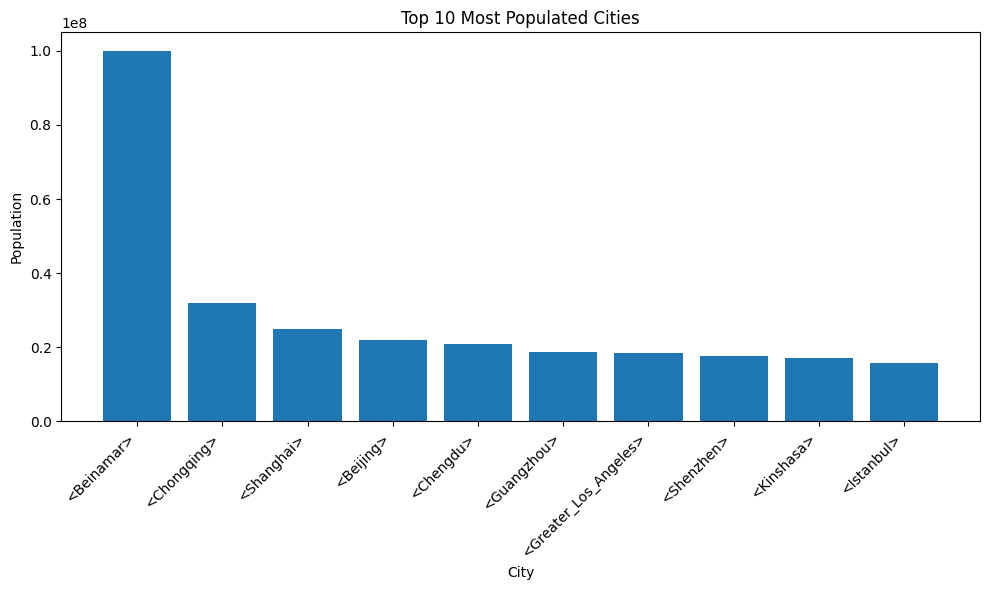

In [8]:
query_response = endpoint.select("""
SELECT ?city ?population
WHERE {
    ?city a dbo:City .
    ?city dbo:populationTotal ?population .
}
ORDER BY DESC(?population)
LIMIT 10
""")

# Convert the query response to a Pandas DataFrame
df = pd.DataFrame(query_response)

# Extract the city names and populations
cities = df['city'].apply(lambda x: x.split('/')[-1]).tolist()
populations = df['population'].tolist()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cities, populations)
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Top 10 Most Populated Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## AI support
Systems like ChatGPT or Gemini (integrated in colab) could be very useful for supporting us in making queries. The following prompt in Gemini, show us 5 singers.

> NOTE: You should change the ENDPOINT to point to wikipedia in the second cell




In [10]:
# prompt: Make a query for showing 5 pictures from singers at wikidata

query_response = endpoint.select("""
SELECT ?name ?pic
WHERE{
    ?person wdt:P106 wd:Q177220 .
    ?person wdt:P18 ?pic .
    ?person rdfs:label ?name .
    FILTER (LANG(?name) = 'en')
}
LIMIT 5
""")

for index, row in query_response.iterrows():
    display(HTML('<img src="{0}">'.format(row['pic'])))


# Exercise 1
Could you show the pictures of 5 politicians?


# Complex queries and charts
In the following examples we will ask for 15 battles during the middle age in Spain and we will create a temporal chart pointing to the date and including, if possible, a picture from dbpedia.


In [11]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from io import BytesIO
import requests
from PIL import Image


query_response = endpoint.select("""
SELECT ?event ?eventLabel (str(?date) AS ?formattedDate) ?picture
WHERE {
    ?event a dbo:Event .
    ?event rdfs:label ?eventLabel .
    FILTER (LANG(?eventLabel) = 'en')
    ?event dbo:date ?date ;
                 dbo:place <http://dbpedia.org/resource/Spain> .
    OPTIONAL {?event dbo:thumbnail ?picture}
    FILTER (?date >= "0500-01-01"^^xsd:dateTime && ?date <= "1500-01-01"^^xsd:dateTime) .
}
ORDER BY ASC(?date)
LIMIT 15
""")


Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Alfonso_I_de_Aragón_por_Pradilla_(1879).jpg?width=300: not a PNG file
Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Otíñar_-_Castillo.jpg?width=300: cannot identify image file <_io.BytesIO object at 0x79d7be098b80>
Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Batalla_del_Puig_por_Marzal_de_Sas_(1410-20).jpg?width=300: not a PNG file
Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Alhamar,_rey_de_Granada,_rinde_vasallaje_al_rey_de_Castilla,_Fernando_III_el_Santo_(Museo_del_Prado).jpg?width=300: not a PNG file
Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Estelamerini.jpg?width=300: not a PNG file
Error processing image http://commons.wikimedia.org/wiki/Special:FilePath/Alfonso&nbsp;X_el_Sabio_(José_Alcoverro)_02.jpg?width=300: cannot identify image file <_io.BytesIO object at 0x79d7bdf9df80>


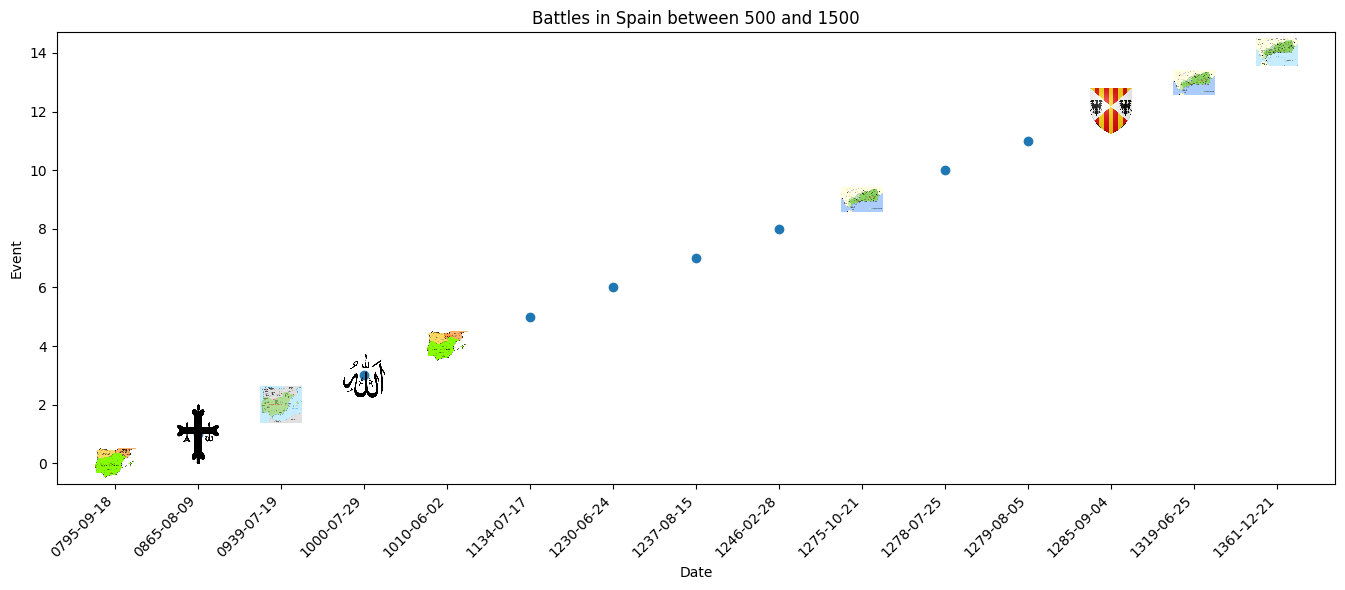

In [12]:
# Create a list to store the events and their dates
events = []
dates = []
pictures = []
for index, row in query_response.iterrows():
    events.append(row['eventLabel'])
    dates.append(row['formattedDate'])
    if 'picture' in row:
        pictures.append(row['picture'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the events and dates as a scatter plot
ax.scatter(dates, range(len(events)))

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Event')
ax.set_title('Battles in Spain between 500 and 1500')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Iterate through the pictures and add them as annotations
for i, picture in enumerate(pictures):
  if picture is not None:
    try:
      headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
      }
      response = requests.get(str(picture), headers=headers, allow_redirects=True)
      image = Image.open(BytesIO(response.content))
      image_data = mpimg.imread(BytesIO(response.content))
      imagebox = OffsetImage(image_data, zoom=0.1)
      ab = AnnotationBbox(imagebox, (dates[i], i), frameon=False)
      ax.add_artist(ab)
    except Exception as e:
      print(f"Error processing image {picture}: {e}")

# Show the plot
plt.tight_layout()
plt.show()

# Exercise 2
Could you change the Country to see the battles from another place?

Change the following two cells:

- First cell, Query. Change the Spain resource for that you want to query
- Second cell, chart. Change the name in the Chart

# Exercise 3
Execute three of the queries in the slides and see the result.
> Tip: You can copy/paste the first query in this Notebook and change only the SPARQL
> **Note**: If you want to change from DBpedia to Wikidata, remember to change the ENDPOINT

# Exercise 4
Search in DBpedia or Wikidata any of this information:

- Countries with more renta per capita
- Biggest countries in extension
- Richest companies


In [ ]:
query_response = endpoint.select("""
SELECT ?company ?companyLabel ?revenue
WHERE {
  ?company a dbo:Company .
....
}
ORDER BY DESC(?revenue)
LIMIT 15
""")

query_response


In [ ]:
# Convert the query response to a Pandas DataFrame
df = pd.DataFrame(query_response)

# CHANGE to the proper labels
cities = df['LABEL1'].apply(lambda x: x.split('/')[-1]).tolist()
populations = df['AMOUNTof...'].tolist()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cities, populations)
plt.xlabel('Label to show in X axis')
plt.ylabel('Label to show in Y axis')
plt.title('TITLE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exercise 5
Run any query involving pictures to be displayed